## Testing the MSM Package

Building a first multi-state model using the supplied "cav" data.

The "cav" data, comes with the msm library, and comes from Sharples et al. (2003) study of the progression of coronary allograft vasculopathy (CAV) - a post-transplant deterioration of the arterial walls.

Dataset has 2816 state observations, defined as:

- state 1: No CAV
- state 2: Mild / Moderate CAV
- state 3: Severe CAV
- state 4: Death

**This code and markup / explanations are taken from Jackson, C. H. (2011) Multi-State Models for Panel Data: The msm Package for R *Journal of Statistical Software* 38(8).**

In [1]:
library("msm")

Warning message:
“package ‘msm’ was built under R version 3.6.3”

In [2]:
cav <- cav[!is.na(cav$pdiag),]
cav

,PTNUM,age,years,dage,sex,pdiag,cumrej,state,firstobs,statemax
1,100002,52.49589,0.000000,21,0,IHD,0,1,1,1
2,100002,53.49863,1.002740,21,0,IHD,2,1,0,1
3,100002,54.49863,2.002740,21,0,IHD,2,2,0,2
4,100002,55.58904,3.093151,21,0,IHD,2,2,0,2
5,100002,56.49589,4.000000,21,0,IHD,3,2,0,2
6,100002,57.49315,4.997260,21,0,IHD,3,3,0,3
7,100002,58.35068,5.854795,21,0,IHD,3,4,0,4
8,100003,29.50685,0.000000,17,0,IHD,0,1,1,1
9,100003,30.69589,1.189041,17,0,IHD,1,1,0,1
10,100003,31.51507,2.008219,17,0,IHD,1,3,0,3


## Define states and transitions allowed for model

Provide initial values representing a guess that the mean period in each state before moving to the next is about two years (qrr = -0.5) and there is an equal probability of progression, recovery or death (qrr = - SUM where s ne r of qrs).  

An alternative to this is to supply the option "gen.inits=TRUE" in the msm function call.  This sets the initial values for non-zero entries of the Q matrix (transition intensity matrix) to the maximum likelihood estimates under the assumption that transitions take place only at observation times.

In [3]:
# Each initial transition block must add up to -qrr (0.5) based on the assumption
# In state 1 there are 2 possible transitions to mild/mod or death
# In state 2 there are 3 possible transitions back to no cav, to severe, or death
# In state 3 there are again 2 possible transitions back to mild/mod or to death
# In state 4 there are no further transitions possible (obviously)

twoway4.q <- rbind(c(0, 0.25, 0, 0.25), c(0.166, 0, 0.166, 0.166), c(0, 0.25, 0, 0.25), c(0,0,0,0))
rownames(twoway4.q) <- colnames(twoway4.q) <- c("Well", "Mild", "Severe", "Death")

In [4]:
cav.msm <- msm(state ~ years, subject = PTNUM, data = cav, qmatrix = twoway4.q, death = 4)

In [5]:
cav.msm


Call:
msm(formula = state ~ years, subject = PTNUM, data = cav, qmatrix = twoway4.q,     death = 4)

Maximum likelihood estimates

Transition intensities
                Baseline                   
Well - Well     -0.17165 (-0.19178,-0.1536)
Well - Mild      0.12920 ( 0.11246, 0.1484)
Well - Death     0.04245 ( 0.03400, 0.0530)
Mild - Well      0.22643 ( 0.16852, 0.3042)
Mild - Mild     -0.60964 (-0.71100,-0.5227)
Mild - Severe    0.34180 ( 0.27243, 0.4288)
Mild - Death     0.04141 ( 0.01200, 0.1429)
Severe - Mild    0.13114 ( 0.07982, 0.2155)
Severe - Severe -0.43572 (-0.55162,-0.3442)
Severe - Death   0.30458 ( 0.23645, 0.3923)

-2 * log-likelihood:  3944.812 
[Note, to obtain old print format, use "printold.msm"]

## Interpreting the Transition Intensities

- Mean time in the Well state: 1/0.1717 = 5.824 years
- Mean time in the Mild state: 1/0.6096 = 1.64 years
- Mean time in the Severe state: 1/0.4357 = 2.295 years


- From the Mild state, the likelihood of transition to Well is: 0.2264 (23%)
- From the Mild state, the likelihood of transition to Severe is: 0.34180 (34%)


- The odds of transition to Severe, given Mild: 0.34180 / 0.26781 (0.2264 + 0.04141) = 1.276
- The odds of transition to Well, given Mild: 0.2264 / 0.38321 (0.34180 + 0.04141) = 0.5908
- The odds ratio: 1.276 / 0.5908 = One is 2.16 times more likely to become Severe than Well, once Mild.
- .23 / .34-.23 = 40.4% more likely to go Mild -> Severe, than Mild -> Well


- The odds of Death given Severe: 0.30458 / 0.13114 = 2.323
- The odds of Death once Severe are 2.323 to 1.


In [6]:
# Display the Transition Probability Matrix, P(t) over an interval of t=1 (in this case, 1 year)
# ci = "normal" computes a confidence interval for P(t) by repeated sampling from the asymptotic 
# normal distribution of the maximum likelihood estimates of the log(qrs)
# Based on a default 1000 samples, converged to within 2 significant figures
# ci = "boot" will instead compute intervals using nonparametric bootstrap resampling, drawn with replacement
# the model is refitted repeatedly to estimate the sampling uncertainty surrounding the estimates 
# more accurate, but slower
pmatrix.msm(cav.msm, t = 1, ci = "normal")

       Well                        Mild                       
Well   0.853041 (0.839873,0.86649) 0.089166 (0.078682,0.09982)
Mild   0.156269 (0.119468,0.20198) 0.565856 (0.508510,0.60833)
Severe 0.009997 (0.005865,0.01631) 0.078848 (0.048978,0.12003)
Death  0                           0                          
       Severe                      Death                      
Well   0.014866 (0.011441,0.01821) 0.042927 (0.035850,0.05271)
Mild   0.205504 (0.164755,0.24234) 0.072371 (0.053939,0.13482)
Severe 0.660577 (0.592036,0.71401) 0.250579 (0.203278,0.30601)
Death  0                           1.000000 (1.000000,1.00000)

## Transition Probabilities

- The probability of being Well 1 year from now, given Well is 85%
- The probability of being Severe 1 year from now, given Mild is 21%
- The probability of being Dead 1 year from now, given Severe is 25%

In [7]:
# A model with covariates: dage (age at transplant) and IHD (Ischemic Heart Disease, yes or no)

ihd <- as.numeric(cav[, "pdiag"] == "IHD")
cav.cov.msm <- msm(state ~ years, subject = PTNUM, data = cav, covariates = ~ dage + ihd, 
                   qmatrix = twoway4.q, death = 4, method = "BFGS", 
                   control = list(fnscale=4000, maxit=10000))

In [8]:
# Display hazard ratios for each covariate on each transition with 95% confidence intervals
hazard.msm(cav.cov.msm)

,HR,L,U
Well - Mild,1.0192338,1.0068502,1.031770
Well - Death,1.0381550,1.0180831,1.058623
Mild - Well,0.9981551,0.9725458,1.024439
Mild - Severe,0.9856465,0.9674891,1.004145
Mild - Death,0.9319173,0.8441461,1.028815
Severe - Mild,0.9976760,0.9476897,1.050299
Severe - Death,0.9884479,0.9648268,1.012647
,HR,L,U
Well - Mild,1.5670475,1.1810830,2.079141
Well - Death,1.3025416,0.8197953,2.069559


## Interpreting the Hazard Ratios

- An initial diagnosis of IHD increases the risk of CAV onset (Well -> Mild) by 57%
- 1 year increase in donor age is associated with a 2% increased risk of CAV onset (Well -> Mild)
- 1 year increase in donor age is associated with a 3.8% increased risk of Death (Well -> Death)

All of the other intervals cross 1, so there is a lot of variability in the impact of the covariate on the transition being examined.



In [9]:
# Calculating the Transition Intensity Matrix for specified covariates
# Donor age: 50, Primary Diagnosis: IHD
# Note: Avg age donor is 30, and about half of heart transplants are due to IHD

qmatrix.msm(cav.cov.msm, covariates = list(dage = 50, ihd = 1))


       Well                          Mild                         
Well   -0.34343 (-0.4383457,-0.2691)  0.24638 ( 0.1822871, 0.3330)
Mild    0.21940 ( 0.1148818, 0.4190) -0.48006 (-0.6862295,-0.3358)
Severe 0                              0.11179 ( 0.0367642, 0.3399)
Death  0                             0                            
       Severe                        Death                        
Well   0                              0.09706 ( 0.0649868, 0.1449)
Mild    0.24821 ( 0.1584555, 0.3888)  0.01246 ( 0.0007292, 0.2128)
Severe -0.32336 (-0.5476403,-0.1909)  0.21158 ( 0.1216081, 0.3681)
Death  0                             0                            

## Comparing this patient to the average patient

- Average patient's likelihood of transition from Well -> Mild 13%, for this patient it is 25%
- Average patient's likelihood of transition from Well -> Death 4%, for this patient it is 9.7%
- Average patient's likelihood of transition from Mild -> Severe 34%, for this patient it is 25%
- Average patient's likelihood of transition from Mild -> Death 4%, for this patient it is 1%


- Average patient's mean time in Well state 5.8 yrs, this patient 2.9 yrs
- Average patient's mean time in Mild state 1.6 yrs, this patient 2.1 yrs
- Average patient's mean time in Severe state 2.3 yrs, this patient 3.1 yrs

In [10]:
# Does the model with covariates fit significantly better than the one without? 
# Compare the likelihood ratio statistic to Chi-square distribution with 14 degrees of freedom

lrtest.msm(cav.msm, cav.cov.msm)

,-2 log LR,df,p
cav.cov.msm,58.02736,14,2.59407e-07


The p-value is highly significant.

## When Q is piecewise-constant

Transition probabilities can be calculated in closed form by summing the likelihood over the unknown observed state at the times when the covariates change.

In [11]:
# Fitting a model where all intensities change 5 years after transplantation
# Divides data into 2 time periods: -Inf to 5 yrs, and 5 yrs to Inf

cav.pci.msm <- msm(state ~ years, subject = PTNUM, data = cav, qmatrix = twoway4.q, 
                   death = 4, pci = 5, method = "BFGS")

# Is this data truly time-inhomogenous?
lrtest.msm(cav.msm, cav.pci.msm)

,-2 log LR,df,p
cav.pci.msm,48.6895,7,2.609964e-08


It is very likely that the data is time-inhomogenous.

In [12]:
hazard.msm(cav.pci.msm)

,HR,L,U
Well - Mild,2.2079750,1.6417953,2.969404
Well - Death,0.6717832,0.2475004,1.823402
Mild - Well,0.6635648,0.3582460,1.229095
Mild - Severe,0.9167601,0.5749189,1.461857
Mild - Death,12.9098844,0.1402478,1188.361304
Severe - Mild,1.4255951,0.4754527,4.274498
Severe - Death,1.6829959,0.8472465,3.343154


There is an increased onset rate of Mild CAV in the second period, but no significant impact of time on the other transitions (all HR CIs cross 1). 

## Dealing with Censored Patients

Fitting the model where state = 99 indicates the patient is alive, but in an unknown state (other than 4)

In [13]:
# This is how it is fitted, but there's no change in results because no patients in the toy data 
# set are censored.
cav.msm.censored <- msm(state ~ years, subject = PTNUM, data = cav, qmatrix = twoway4.q, death = TRUE, 
                       censor = 99, censor.states = c(1, 2, 3))

cav.msm.censored

Warning message in msm.check.state(qmodel$nstates, mf$"(state)", cmodel$censor, :
“State vector doesn't contain observations of 99”


Call:
msm(formula = state ~ years, subject = PTNUM, data = cav, qmatrix = twoway4.q,     death = TRUE, censor = 99, censor.states = c(1, 2, 3))

Maximum likelihood estimates

Transition intensities
                Baseline                   
Well - Well     -0.17165 (-0.19178,-0.1536)
Well - Mild      0.12920 ( 0.11246, 0.1484)
Well - Death     0.04245 ( 0.03400, 0.0530)
Mild - Well      0.22643 ( 0.16852, 0.3042)
Mild - Mild     -0.60964 (-0.71100,-0.5227)
Mild - Severe    0.34180 ( 0.27243, 0.4288)
Mild - Death     0.04141 ( 0.01200, 0.1429)
Severe - Mild    0.13114 ( 0.07982, 0.2155)
Severe - Severe -0.43572 (-0.55162,-0.3442)
Severe - Death   0.30458 ( 0.23645, 0.3923)

-2 * log-likelihood:  3944.812 
[Note, to obtain old print format, use "printold.msm"]

## Diagnostic Plots

Comparing model predictions with Kaplan-Meier curves

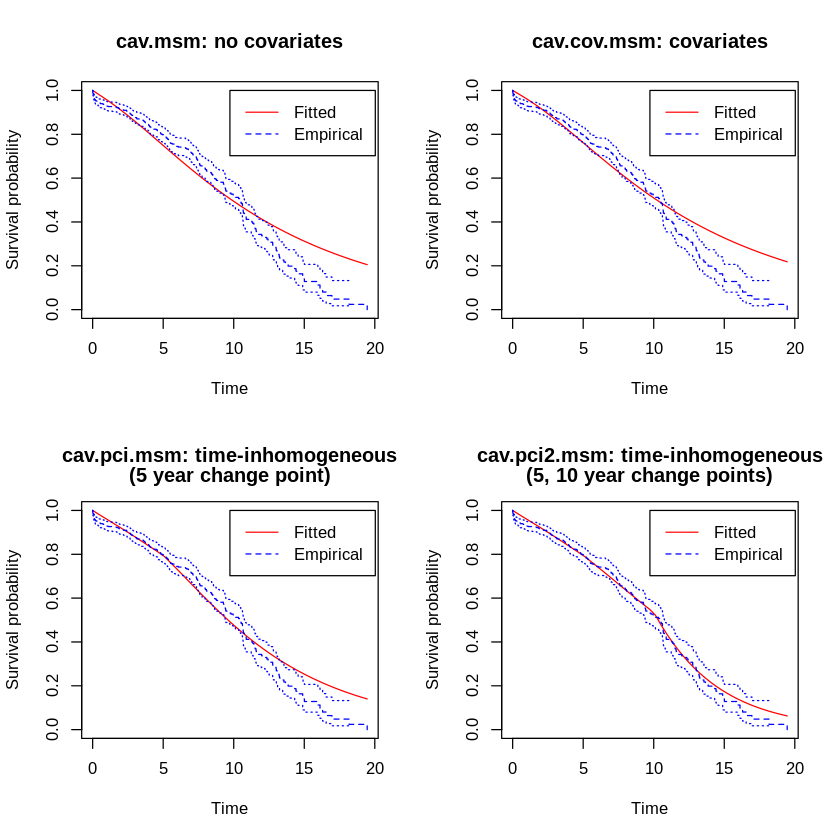

In [14]:
par(mfrow = c(2, 2))
plot.survfit.msm(cav.msm, main = "cav.msm: no covariates", mark.time = FALSE)
plot.survfit.msm(cav.cov.msm, main = "cav.cov.msm: covariates", mark.time = FALSE)
plot.survfit.msm(cav.pci.msm, mark.time = FALSE)
title("cav.pci.msm: time-inhomogeneous", line = 2)
title("(5 year change point)", line = 1)
cav.pci2.msm <- msm(state ~ years, subject = PTNUM, data = cav, qmatrix = twoway4.q, death = 4, pci = c(5, 10), 
                   method = "BFGS", control = list(maxit = 10000))
plot.survfit.msm(cav.pci2.msm, mark.time = FALSE)
title("cav.pci2.msm: time-inhomogeneous", line = 2)
title("(5, 10 year change points)", line = 1)

Up to about 10 years, the models do a reasonable job of predicting survival.  However, the second time-inhomogeneous model, fitted for intensity changes at 5 and 10 years, fits substantially better because the other models over-estimate survival after 10 years.

## Comparing Observed and Expected Prevalence

Works best when individuals are actually observed at the computed times, otherwise assumptions are made such as individuals are only observed at these times, or midpoints are assumed.

The observed prevalence of a state is simply calculated as the number of individuals known to be in that state, divided by the number of individuals whose state is known at that time, which ignores the information from individuals censored at earlier times (root of Kaplan-Meier estimation :))

In [15]:
# Need to look at how this is implemented by Gentleman et al. 1994 using prevalence.msm, and plot.prevalence.msm

## Pearson testing

Aguirre-Hernandez and Farewell (2002)

Titman and Sharples (2008)

Uses a Chi-square approximation even though often doesn't fit exactly.  Recommended to reduce the number of observation times, time intervals or covariate categories to improve Chi-square approximation especially with a sparse contingency table.

In [16]:
p1 <- pearson.msm(cav.msm)
p1$test


Imputing sampling times after deaths...
Calculating replicates of test statistics for imputations...


stat,df.lower,p.lower,df.upper,p.upper
166.9542,NA,NA,81,6.444851e-08


In [17]:
p2 <- pearson.msm(cav.cov.msm)
p2$test


Imputing sampling times after deaths...
Calculating replicates of test statistics for imputations...


stat,df.lower,p.lower,df.upper,p.upper
302.8504,NA,NA,237,0.002457122


In [18]:
p3 <- pearson.msm(cav.pci.msm)
p3$test

Warning message in pearson.msm(cav.pci.msm):
“Omitting censored states not at the end of individual series”

Imputing sampling times after deaths...
Calculating replicates of test statistics for imputations...


stat,df.lower,p.lower,df.upper,p.upper
161.6173,NA,NA,81,2.647557e-07


In [19]:
p4 <- pearson.msm(cav.pci2.msm)
p4$test

Warning message in pearson.msm(cav.pci2.msm):
“Omitting censored states not at the end of individual series”

Imputing sampling times after deaths...
Calculating replicates of test statistics for imputations...


stat,df.lower,p.lower,df.upper,p.upper
150.2663,NA,NA,81,4.657213e-06


## None of these models give an adequate fit

While cav.pci2.msm fits well to survival, it discriminates less well between the states of CAV severity.  

A more complex pattern of time-dependence or allowing transition intensities to depend on covariates would likely yield a better fit.

## It is also possible to calculate the influence of each individual on the MLE

Using scoreresid.msm

## Extensions of msm and limitations

For continuously-observed processes: mstate (deWreede et al. 2010)

For Random Effects models (unexplained heterogeneity in transition intensities between individuals) - calculating likelihood often intractable with a few exceptions: tracking model - random effect acts on all intensities simultaneously (Satten 1999), or a discrete random effects distribution (Cook et al 2004)